<a href="https://colab.research.google.com/github/padowskaa3/10373369-AP-s1/blob/main/Machine_Learning_Project_dem0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
cols = ['user_id', 'gender', 'age', 'annual_salary', 'purchase']
cd = pd.read_csv(r'./data/car_data.csv', names=cols)

cd.head()

,user_id,gender,age,annual_salary,purchase
0,1.0,Male,32.0,100000.0,1.0
1,2.0,Female,38.0,63500.0,0.0
2,3.0,Male,20.0,74000.0,0.0
3,4.0,Female,48.0,119000.0,1.0
4,5.0,Male,41.0,108500.0,1.0


In [ ]:
print("Dataset information:")
cd.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        1336 non-null   float64
 1   gender         1336 non-null   object 
 2   age            1336 non-null   float64
 3   annual_salary  1336 non-null   float64
 4   purchase       1336 non-null   float64
dtypes: float64(4), object(1)
memory usage: 52.4+ KB


In [ ]:
print("Dataset shape:")
cd.shape

Dataset shape:


(1337, 5)

In [ ]:
print("Checking for unique values in each column")
cd.nunique()

Checking for unique values in each column


user_id          1336
gender              2
age                46
annual_salary     265
purchase            2
dtype: int64

In [ ]:
print("Checking for any null values:")
cd.isnull().any()

Checking for any null values:


user_id          True
gender           True
age              True
annual_salary    True
purchase         True
dtype: bool

In [ ]:
cd = cd.dropna()

In [ ]:
print("Checking for any null values:")
cd.isnull().any()

Checking for any null values:


user_id          False
gender           False
age              False
annual_salary    False
purchase         False
dtype: bool

In [ ]:
cd.shape

(1336, 5)

In [ ]:
# for the research we do not need floats as the data type for numerical values
# as we we don't need decimal points we can change them into integers
cd.user_id = cd.user_id.astype(int)
cd.age = cd.age.astype(int)
cd.annual_salary = cd.annual_salary.astype(int)
cd.purchase = cd.purchase.astype(int)

In [ ]:
cd.head()

,user_id,gender,age,annual_salary,purchase
0,1,Male,32,100000,1
1,2,Female,38,63500,0
2,3,Male,20,74000,0
3,4,Female,48,119000,1
4,5,Male,41,108500,1


# Creating a Plot


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cd_plot = cd.copy()
#I am using a lambda function 
# it is a free variable that is not bound and may be referenced in the body of the expression
cd_plot.gender = cd_plot.gender.apply(lambda x: 1 if x == 'Male' else 0)

In [ ]:
cd_plot['age_group'] = cd_plot.age.copy()
cd_plot['age_group'] = cd_plot['age_group'].apply(
    lambda x: 1 if (x >= 18 and x < 31) else 2 if ( x>= 31 and x < 46) 
    else 3 if ( x >= 46 and x < 61) else 4)
# same in this example, we can use transforming or mapping funtion 
# to change these objectives into numerical cathegories or just segregate into new groups 

In [ ]:
cd_plot.head()

,user_id,gender,age,annual_salary,purchase,age_group
0,1,1,32,100000,1,2
1,2,0,38,63500,0,2
2,3,1,20,74000,0,1
3,4,0,48,119000,1,3
4,5,1,41,108500,1,2


In [ ]:
X = cd_plot.iloc[:,2:-3].values
y = cd_plot.iloc[:,-2].values
z = cd_plot.iloc[:,1:-2]

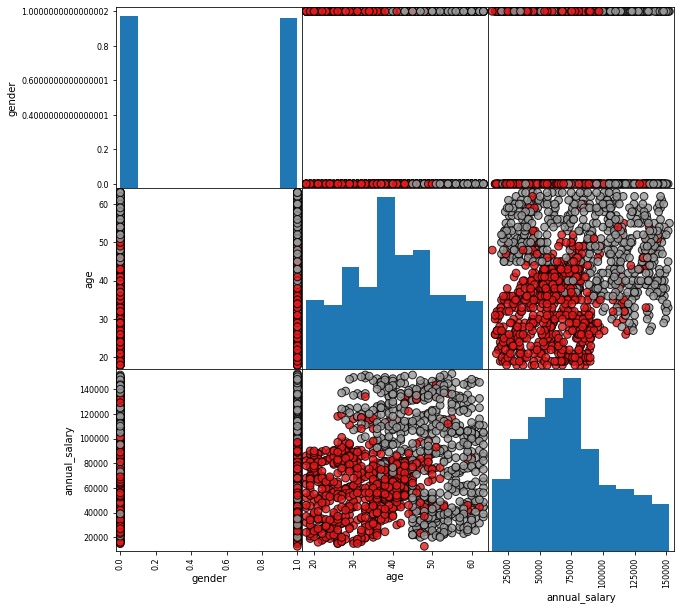

In [ ]:
graph = pd.plotting.scatter_matrix(z, c=y, figsize=(10,10), marker='o',s = 60, alpha=0.8, cmap=plt.cm.Set1, edgecolor='k')

# Classificators


Neutral Network Classifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=100, random_state=0)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_test_predict = model.predict(X_test)
print("Prediction:", y_test_predict)
print("Actual values:", y_test)

Prediction: [0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1
 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
Actual values: [0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 

In [ ]:
accuracy = model.score(X_test, y_test)
print("Training score: {:.3f}".format(accuracy))

Training score: 0.828


K-Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [ ]:
y_test_predict = model.predict(X_test)
print("Prediction:", y_test_predict)
print("Actual values:", y_test)

Prediction: [0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0
 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1
 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1
 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0
 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Actual values: [0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 

In [ ]:
accuracy = model.score(X_test, y_test)
print("Training score: {:.3f}".format(accuracy))

Training score: 0.781


In [ ]:
print("Training score: {:.3f}".format(train_score))
print("Test score: {:.3f}".format(test_score))

Training score: 0.776
Test score: 0.781


Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
accuracy = model.score(X_test, y_test)
print("Model accuracy: {:.2f}".format(accuracy))

Model accuracy: 0.83


Naive Bayes Classificator

In [ ]:
# This part of code is based on Naive Bayes Classifier in Python code from kaggle: 
# https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python by PRASHANT BANERJEE 2020

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_train = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_train)))

Model accuracy score: 0.8279


In [ ]:
#check for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7957
Test set score: 0.8279


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_train)

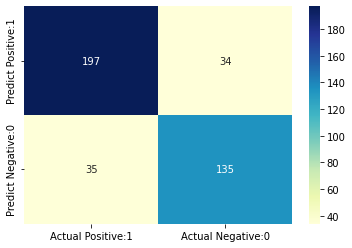

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
precision = TP / float(TP + FP)

print('Precision: {0:0.4f}'.format(precision))

Precision: 0.8528


In [ ]:
recall = TP / float(TP + FN)

print('Recall: {0:0.4f}'.format(recall))

Recall: 0.8491


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       231
           1       0.80      0.79      0.80       170

    accuracy                           0.83       401
   macro avg       0.82      0.82      0.82       401
weighted avg       0.83      0.83      0.83       401



In [ ]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.62597627, 0.37402373],
       [0.22928905, 0.77071095],
       [0.11953768, 0.88046232],
       [0.98472668, 0.01527332],
       [0.48626083, 0.51373917],
       [0.30492351, 0.69507649],
       [0.89934976, 0.10065024],
       [0.11953768, 0.88046232],
       [0.83719294, 0.16280706],
       [0.02188818, 0.97811182]])

In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))
print('Accuracy: {:.4f}'.format(gnb.score(X_train, y_train)))

Cross-validation scores:[0.80851064 0.77659574 0.78723404 0.78723404 0.86170213 0.74193548
 0.77419355 0.84946237 0.77419355 0.78494624]
Average cross-validation score: 0.7946
Accuracy: 0.7957
